**Names of everyone present in your group:**

Zachary Qian

Chris Conatzer

____

# Group project: plotting the penguins dataset

This discussion activity is part of your group mini-project, described here: <https://philchodrow.github.io/PIC16A/project/>.

Run the following cell to download the penguin dataset into a local `palmer_penguins.csv` file.

In [1]:
import urllib

url = 'https://philchodrow.github.io/PIC16A/datasets/palmer_penguins.csv'
filedata = urllib.request.urlopen(url)
with open('palmer_penguins.csv', 'wb') as f:
    f.write(filedata.read())

In the next cell we will import all the modules that we'll need in order to process the dataset. As you progress through the worksheet, add `import` statements for the modules you need to the following cell (and run the cell each time you add a new item).

In [45]:
# put all your import directives here (add new ones once you need them)
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import scipy
import string as str

import random
import math

In the next cell, load the penguins dataset from the `csv` file into a `pandas` dataframe called `penguins`. Import any modules you need in the cell above. Use the conventional short aliases for the modules.

In [6]:
penguins = pd.read_csv('palmer_penguins.csv')
#penguins.head()

Run the next cell to check that your data was read in correctly, and to see what the dataset looks like.

In [7]:
penguins

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
0,PAL0708,1,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A1,Yes,11/11/07,39.1,18.7,181.0,3750.0,MALE,NaN,NaN,Not enough blood for isotopes.
1,PAL0708,2,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A2,Yes,11/11/07,39.5,17.4,186.0,3800.0,FEMALE,8.94956,-24.69454,NaN
2,PAL0708,3,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A1,Yes,11/16/07,40.3,18.0,195.0,3250.0,FEMALE,8.36821,-25.33302,NaN
3,PAL0708,4,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A2,Yes,11/16/07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Adult not sampled.
4,PAL0708,5,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N3A1,Yes,11/16/07,36.7,19.3,193.0,3450.0,FEMALE,8.76651,-25.32426,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
339,PAL0910,120,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",N38A2,No,12/1/09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
340,PAL0910,121,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",N39A1,Yes,11/22/09,46.8,14.3,215.0,4850.0,FEMALE,8.41151,-26.13832,NaN
341,PAL0910,122,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",N39A2,Yes,11/22/09,50.4,15.7,222.0,5750.0,MALE,8.30166,-26.04117,NaN
342,PAL0910,123,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",N43A1,Yes,11/22/09,45.2,14.8,212.0,5200.0,FEMALE,8.24246,-26.11969,NaN


### §1. Basic scatterplot

Run the next cell and observe the output.

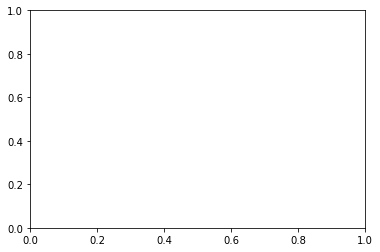

In [8]:
fig, ax = plt.subplots(1)

We want to turn the plot above into a scatterplot of the length against the depth of the penguins' culmens. (The culmen, defined by Wikipedia as "the dorsal ridge of the upper mandible", is just the ridge that runs down the whole length of the top of the beak.) First let's label the axes:

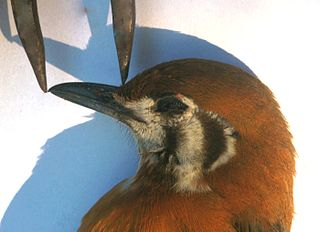
<center><i>A bird (probably not a penguin) getting its culmen length measured</i></center>

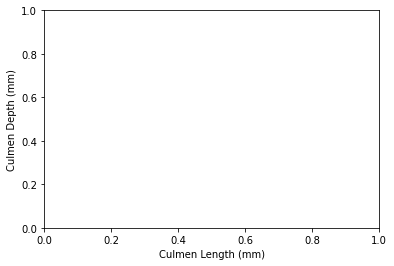

In [10]:
#setting the labels for our plot lmfao
ax.set(xlabel = "Culmen Length (mm)",
       ylabel = "Culmen Depth (mm)")
fig

Our scatterplot will be a plot of points in which each point corresponds to one penguin. The location of the point is a pair of the two variables, culmen length and depth, of that penguin. Call the `ax.scatter` function with the two appropriate columns of your `penguins` dataframe passed as the two arguments. (Make sure to put them in the right order.)

In [11]:
penguins.head()

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
0,PAL0708,1,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A1,Yes,11/11/07,39.1,18.7,181.0,3750.0,MALE,NaN,NaN,Not enough blood for isotopes.
1,PAL0708,2,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A2,Yes,11/11/07,39.5,17.4,186.0,3800.0,FEMALE,8.94956,-24.69454,NaN
2,PAL0708,3,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A1,Yes,11/16/07,40.3,18.0,195.0,3250.0,FEMALE,8.36821,-25.33302,NaN
3,PAL0708,4,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A2,Yes,11/16/07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Adult not sampled.
4,PAL0708,5,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N3A1,Yes,11/16/07,36.7,19.3,193.0,3450.0,FEMALE,8.76651,-25.32426,NaN


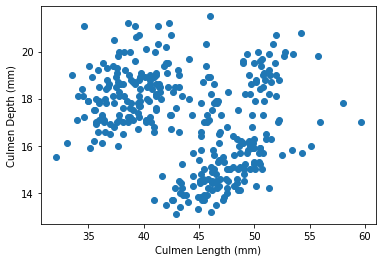

In [12]:
# function call goes here
ax.scatter(penguins["Culmen Length (mm)"],penguins["Culmen Depth (mm)"])
fig

In [18]:
#import scipy.stats
#print(scipy.stats.pearsonr(penguins["Culmen Length (mm)"], penguins["Culmen Depth (mm)"]))

Do you notice any correlation between the culmen length and the culmen depth? For instance, do penguins with longer culmens also have deeper culmens, or is there another relationship? Write your best preliminary guess below.

There really is no uniform correlation, BUT, it seems to have 2 trends, where as our culmen lenght increases, our culmen depth does as well.

### §2. Scatterplot by species

In the cell below, make `fig` and `ax` a new plot, just like in the section above, and label the axes as before.

[Text(0, 0.5, 'Culmen Depth (mm)'), Text(0.5, 0, 'Culmen Length (mm)')]

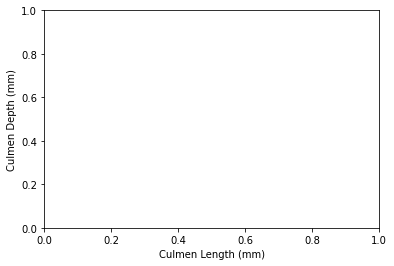

In [71]:
fig, ax = plt.subplots(1)
ax.set(xlabel = "Culmen Length (mm)",
       ylabel = "Culmen Depth (mm)")
#ax.scatter(penguins["Culmen Length (mm)"],penguins["Culmen Depth (mm)"])
#fig

In the next cell, make a set of all the species of penguin in your dataset. Then, iterating over this set of species with a `for` loop, slice off only those penguins from the dataset that are of a given species, and plot their culmen lengths and depths on the scatterplot. (That is, you are plotting each species separately.)

In the `scatter` function, pass a short name for each species to an argument named `label` (for example, you could pass the first word of the full species name), and a value of `0.5` for an argument named `alpha` (this makes the points translucent).

In [67]:
for i in species:
    print(i.split())

['Adelie', 'Penguin', '(Pygoscelis', 'adeliae)']
['Chinstrap', 'penguin', '(Pygoscelis', 'antarctica)']
['Gentoo', 'penguin', '(Pygoscelis', 'papua)']


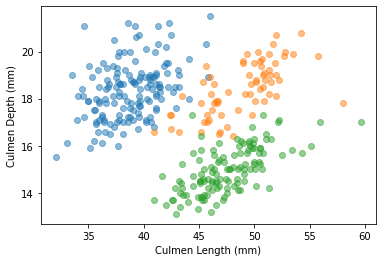

In [72]:
species = set(penguins["Species"])

for i in species:
    df = penguins[penguins["Species"] == i]
    ax.scatter(df["Culmen Length (mm)"],df["Culmen Depth (mm)"], 
               label = i.split()[0], alpha = 0.5)
    #ax.set
    
fig
        
    
        


Lastly, run the next cell to add a legend and show your scatterplot. You should now see different colors for different species.

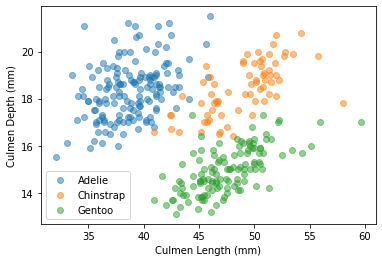

In [73]:
ax.legend()
fig

Do you notice any correlation between the culmen length and the culmen depth for penguins within a given species? See [Simpson's paradox](https://en.m.wikipedia.org/wiki/Simpson%27s_paradox).

Yes, we see a positive correlation for each subgroup. Notice that Gentoo and Chinstrap penguins have the stronger Pearson's correlation coefficient, whereas Adelie is also moderately strong, but not as strong as the former.

### §3. Culmen length histogram

In the next cell, use `ax.hist` to make a histogram of the lengths of the penguins' culmens by species. (This will involve going through all the steps as above, using `ax.hist` in place of `ax.scatter`.) You will need to remove the `NaN` values from your series of culmen lengths -- use `.notnull()`.

Pass the `label` and `alpha` arguments as before, along with the lengths. Your y-axis should be called "Density".

In [88]:
#penguins[penguins["Species"].notnull()] 

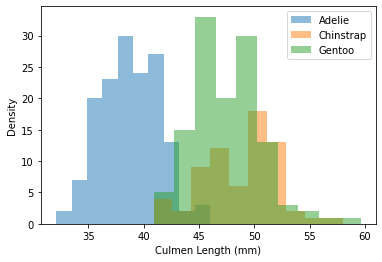

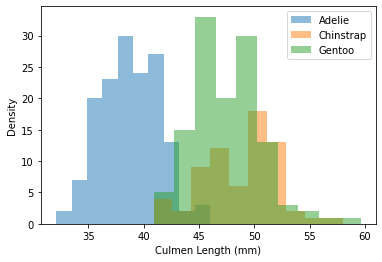

In [93]:
fig, ax = plt.subplots(1)
ax.set(xlabel = "Culmen Length (mm)", ylabel = "Density")


for i in species:
    df = penguins[penguins["Species"] == i]
    #ax.hist(df["Culmen Length (mm)"],label = i.split()[0], alpha = 0.5)
    ax.hist(df[df["Culmen Length (mm)"].notnull()]["Culmen Length (mm)"],
            label = i.split()[0], alpha = 0.5)
    
    
ax.legend()
fig

### §4. Plot by species and location

Pick your favorite type of plot of the two -- scattergram or histogram -- and extend one of the two constructions in the cell below, this time plotting the penguins not just by species but by both species and location (for instance, separate them by a comma). Adjust the text labels accordingly, and provide a legend.